# Libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Load the data

In [3]:
data = pd.read_csv('cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Cleaning Data

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
data_1 = data.copy(deep = True)

In [8]:
data_1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
data_1.drop("id", axis = 1, inplace = True)
data_1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data_1.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
data_1['diagnosis'] = data_1['diagnosis'].map({'M':1,'B':0})
data_1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Describing given Data

In [12]:
data_1.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# converting 0 into mean in colums


In [13]:
data_1['concavity_mean']=data_1['concavity_mean'].replace(0,data_1['concavity_mean'].mean())
data_1['concave points_mean']=data_1['concave points_mean'].replace(0,data_1['concave points_mean'].mean())
data_1['concavity_se']=data_1['concavity_se'].replace(0,data_1['concavity_se'].mean())
data_1['concave points_se']=data_1['concave points_se'].replace(0,data_1['concave points_se'].mean())
data_1['concavity_worst']=data_1['concavity_worst'].replace(0,data_1['concavity_worst'].mean())
data_1['concave points_worst']=data_1['concave points_worst'].replace(0,data_1['concave points_worst'].mean())
data_1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data_1.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090828,0.050037,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.278407,0.117225,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.078553,0.038074,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.204425,0.063350,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.031360,0.021070,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.124200,0.066960,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.066640,0.037000,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.241300,0.104700,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Histogram of diagnosis

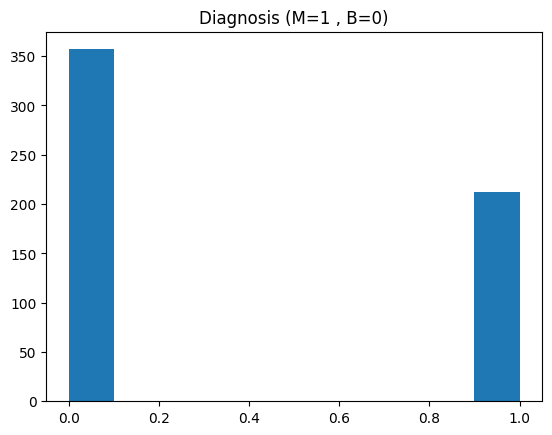

In [15]:
data_1.describe()
plt.hist(data_1['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [16]:
features_mean=list(data_1.columns[1:11])

M =data_1[data_1['diagnosis'] ==1]
B =data_1[data_1['diagnosis'] ==0]

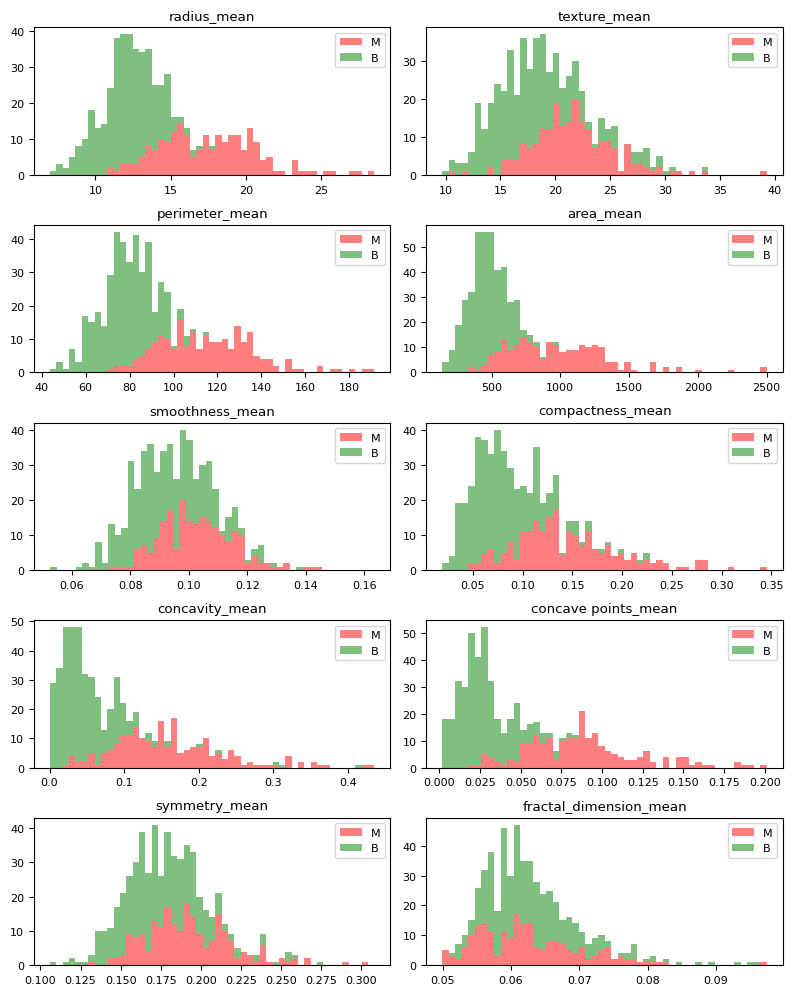

In [17]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data_1[features_mean[idx]]) - min(data_1[features_mean[idx]]))/50
    ax.hist([M[features_mean[idx]],B[features_mean[idx]]], bins=np.arange(min(data_1[features_mean[idx]]), max(data_1[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
    
plt.tight_layout()
plt.show()

# Heatmap

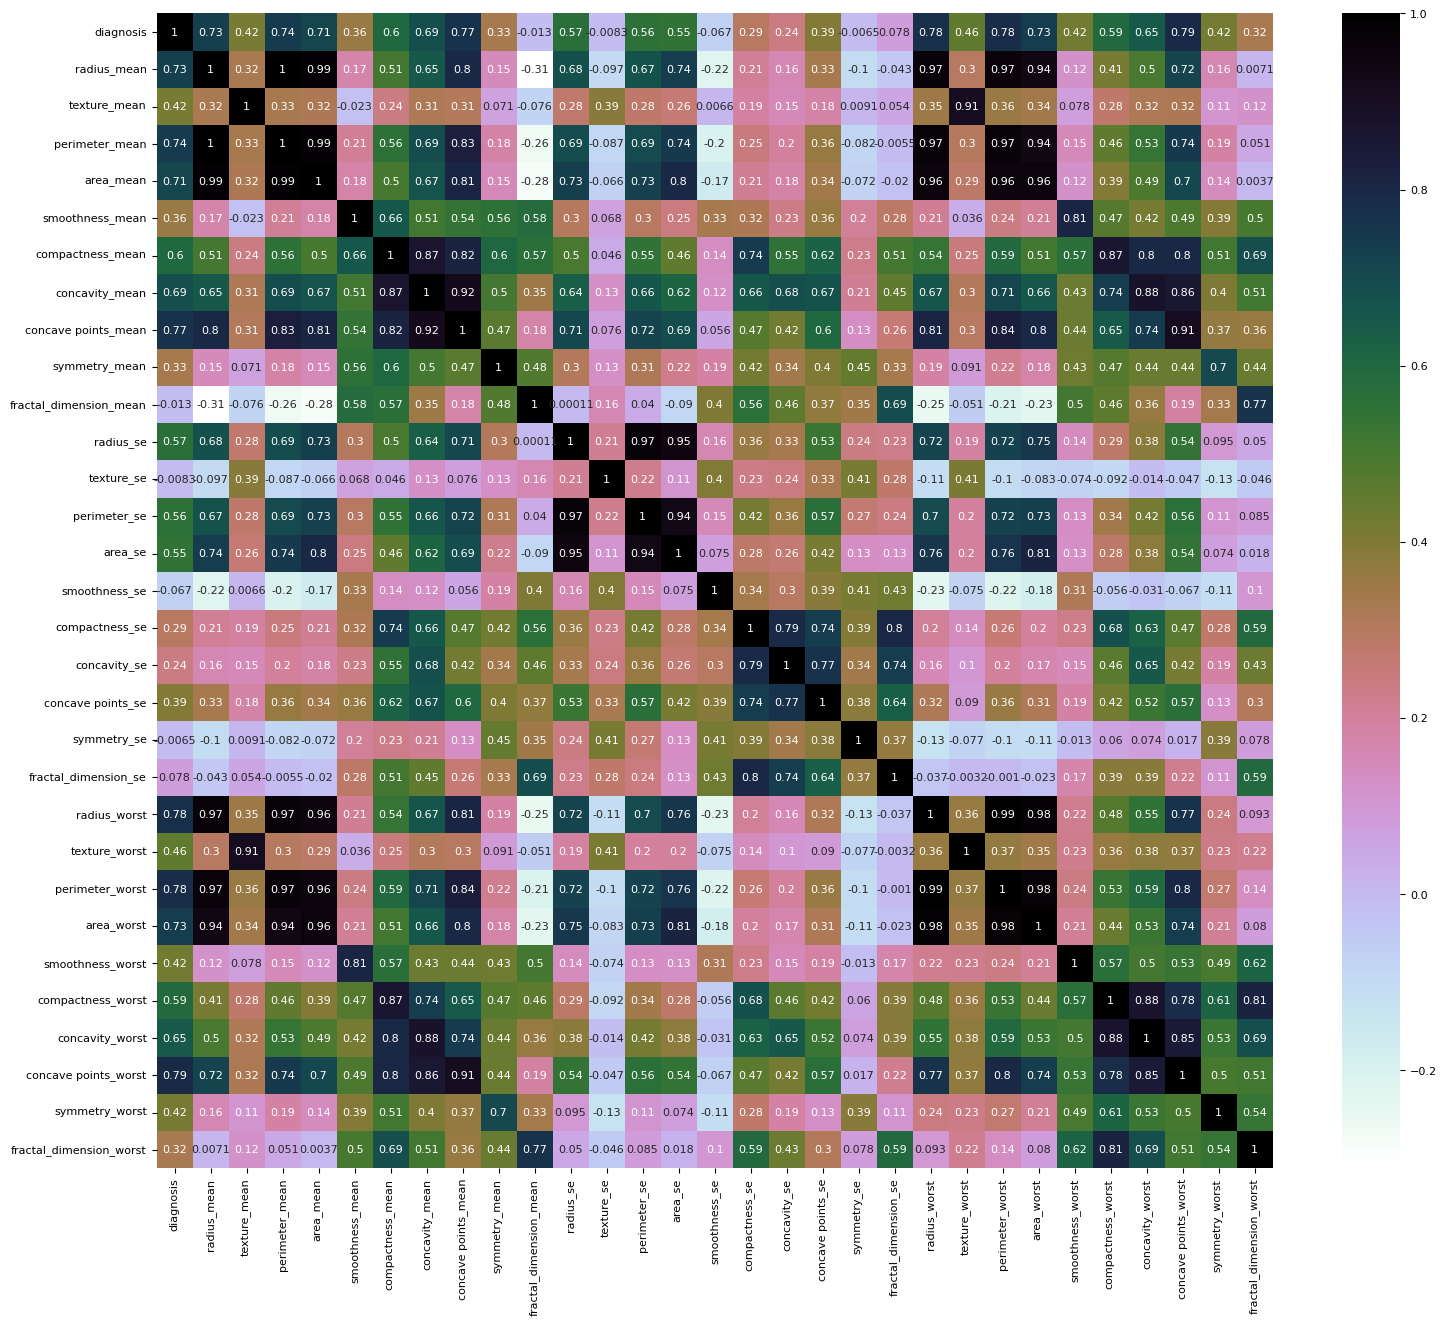

In [18]:
plt.figure(figsize= (18,15))
sns.heatmap(data_1.corr(),  annot = True,cmap= "cubehelix_r")
plt.show()

# Observations
1.From this graphs its clear that mean values of cell radius, perimeter, area, compactness, concavity and fractal dimension mean can be   used for the classification of cancer. Because thses values are dependent factor for cancer.

2.We can say that cancer and this parameters are directly propotional. When this parameter values are increased it will cause     for the malignant tumors.

3.Mean values of texture, concave points mean, Smoothness and Symmetry is not showing any kind of presence in the diagonosis while compared to other parametes.

# Classification

In [19]:
data_1.shape

(569, 31)

In [20]:
train, test = train_test_split(data_1, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [21]:
train_X = train[['radius_mean', 'perimeter_mean','area_mean', 'compactness_mean', 'concavity_mean','fractal_dimension_mean' ]]
train_y = train.diagnosis

test_X = test[['radius_mean', 'perimeter_mean','area_mean', 'compactness_mean', 'concavity_mean','fractal_dimension_mean']]
test_y = test.diagnosis

In [22]:
train_X.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,fractal_dimension_mean
262,17.29,114.40,947.8,0.12730,0.09697,0.05464
331,12.98,84.52,514.0,0.11250,0.07107,0.06540
461,27.42,186.90,2501.0,0.19880,0.36350,0.05623
209,15.27,98.17,725.5,0.06230,0.05892,0.05526
248,10.65,68.01,347.0,0.07234,0.02379,0.06329


In [23]:
test_X.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,fractal_dimension_mean
383,12.39,80.64,462.9,0.12970,0.058920,0.06588
58,13.05,82.61,527.2,0.03789,0.000692,0.05501
474,10.88,70.41,358.9,0.10690,0.051150,0.06837
47,13.17,85.98,534.6,0.12310,0.122600,0.06777
226,10.44,66.62,329.6,0.07722,0.006643,0.06450


# Classifier

In [24]:
# Decision Tree - CART
model1 = DecisionTreeClassifier()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       104
           1       0.80      0.82      0.81        67

    accuracy                           0.85       171
   macro avg       0.84      0.84      0.84       171
weighted avg       0.85      0.85      0.85       171



In [25]:
#  KNN
model2 = KNeighborsClassifier(n_neighbors = 3)
model2.fit(train_X, train_y)
prediction = model2.predict(test_X)
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       104
           1       0.80      0.78      0.79        67

    accuracy                           0.84       171
   macro avg       0.83      0.83      0.83       171
weighted avg       0.84      0.84      0.84       171



In [26]:
# svm
sv = SVC()
sv.fit(train_X,train_y)
prediction = sv.predict(test_X)
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       104
           1       0.88      0.75      0.81        67

    accuracy                           0.86       171
   macro avg       0.86      0.84      0.85       171
weighted avg       0.86      0.86      0.86       171



In [31]:
area = data_1[['radius_mean', 'perimeter_mean','area_mean','diagnosis']]
other = data_1[['compactness_mean', 'concavity_mean','fractal_dimension_mean','diagnosis' ]]


In [32]:
# area

train_p, test_p = train_test_split(area, test_size = 0.3, random_state =0)
train_x_p = train_p[['radius_mean', 'perimeter_mean','area_mean' ]]
train_y_p = train_p.diagnosis

test_x_p = test_p[['radius_mean', 'perimeter_mean','area_mean' ]]
test_y_p = test_p.diagnosis

In [33]:
# other
train_s, test_s = train_test_split(other, test_size = 0.3, random_state =0)
train_x_s = train_s[['compactness_mean', 'concavity_mean','fractal_dimension_mean' ]]
train_y_s = train_s.diagnosis

test_x_s = test_s[['compactness_mean', 'concavity_mean','fractal_dimension_mean']]
test_y_s = test_s.diagnosis

In [34]:
# 1. SVM
model = svm.SVC()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print("The Accuracy of SVM area is: ",metrics.accuracy_score(prediction, test_y_p))

model1 = svm.SVC()
model1.fit(train_x_s, train_y_s)
prediction1 = model1.predict(test_x_s)
print("The Accuracy of other is: ",metrics.accuracy_score(prediction1, test_y_s))

The Accuracy of SVM area is:  0.8830409356725146
The Accuracy of other is:  0.8771929824561403


# conclusion

As per the result we get we can say that through svm method we get an accuracy of 86% by considering certain factors such that radius mean,perimeter mean,area mean,compactness mean,concavity mean,fractal dimension mean. and also by only considering the area factors we get an accuracy of 88% and the other factors we get an accuracy of 87%. so we can predict an accuracy of 86%-88% while considering the factors we have taken fo the test data set.